In [1]:
import os
import sys
sys.path.append('../src/')

In [2]:
from data.Chexpert import Chexpert
from modules.ChexpertModule import ChexpertDataModule
#from modules.ChexpertModule import ChexpertDataModule
from utils.environment_settings import env_settings
from utils.utils import *
from utils._prepare_data import DataHandler
import matplotlib.pyplot as plt
from torch.utils.data import random_split
import torchvision
import numpy as np
import torch

/home/guests/usr_mlmi/.conda/envs/mlmi/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
params = read_config(env_settings.CONFIG)

In [4]:
processor = DataHandler(opt=params["dataset"])

In [5]:
dataset = processor.records

## Analysis of Classes

In [6]:
labels = []
for i in dataset:
    labels.append(i['label'])

In [7]:
label_matrix = np.vstack(labels)

# Calculate the frequency of each class
class_frequencies = np.sum(label_matrix, axis=0)

# Normalize to get the probability distribution
total_samples = label_matrix.shape[0]
class_distribution = class_frequencies / total_samples

print("Class Distribution Ones:", class_distribution)

Class Distribution Ones: [0.25457044 0.2289952  0.06808212 0.18596941 0.07476061 0.02154893
 0.0316099  0.24796402 0.32168682 0.27192009 0.01179546 0.15380217
 0.05270238 0.30862293]


In [50]:
label_matrix = np.vstack(labels)

# Calculate the frequency of each class
class_frequencies = np.sum(label_matrix, axis=0)

# Normalize to get the probability distribution
total_samples = label_matrix.shape[0]
class_distribution = class_frequencies / total_samples

print("Class Distribution Zeros:", class_distribution)

Class Distribution Zeros: [0.20795557 0.20176235 0.04868568 0.1253057  0.03231138 0.01908413
 0.02685328 0.23109003 0.32168682 0.24549923 0.00855231 0.07204597
 0.04759022 0.30753708]


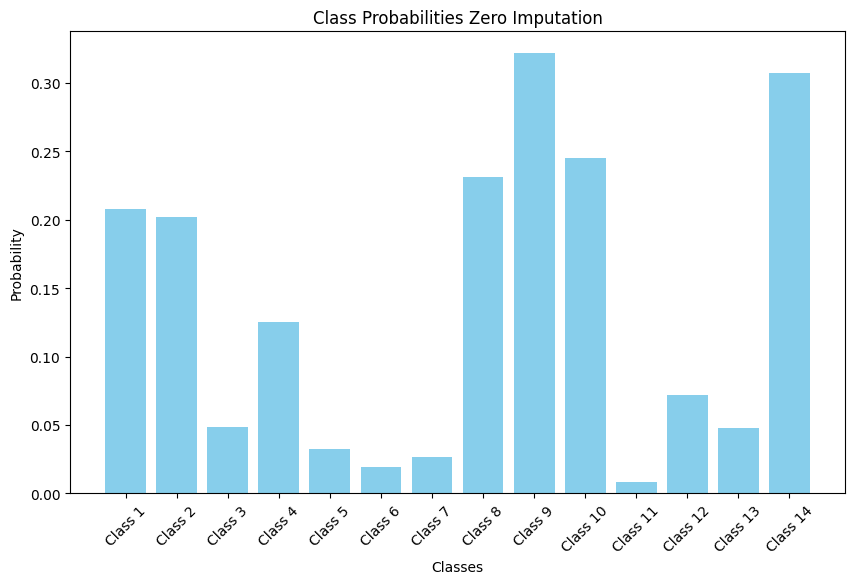

In [43]:
import matplotlib.pyplot as plt

# Class names/numbers (for plotting)
class_names = [f'Class {i+1}' for i in range(len(class_distribution))]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_distribution, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Probability')
plt.title('Class Probabilities Zero Imputation')
plt.xticks(rotation=45)
plt.show()



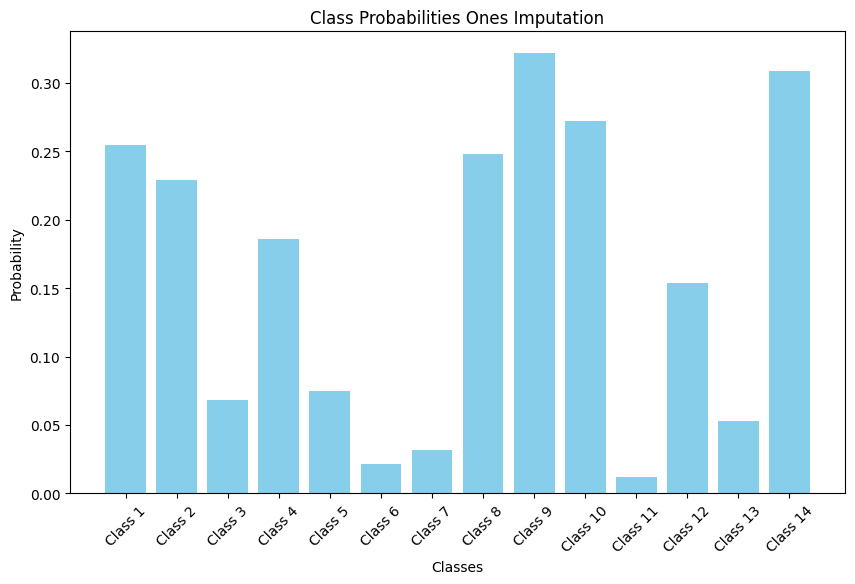

In [8]:
import matplotlib.pyplot as plt

# Class names/numbers (for plotting)
class_names = [f'Class {i+1}' for i in range(len(class_distribution))]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_distribution, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Probability')
plt.title('Class Probabilities Ones Imputation')
plt.xticks(rotation=45)
plt.show()


## Analysis of Combinations

In [9]:
import pandas as pd

def create_reference_distribution_from_dataframe(disease_df):
    # Calculate the total count of all combinations
    total_count = disease_df['Number'].sum()

    # Normalize the counts to get probabilities
    disease_df['Probability'] = disease_df['Number'] / total_count

    # Convert the DataFrame to a dictionary for easy access
    combination_distribution = pd.Series(disease_df['Probability'].values, index=disease_df['Combination']).to_dict()

    return combination_distribution

In [10]:
combination_ones  = pd.read_csv("../src/data/disease_combination_counts_ones.csv")
combination_zeros  = pd.read_csv("../src/data/disease_combination_counts_zeros.csv")

In [11]:
reference_distribution_zeros = create_reference_distribution_from_dataframe(combination_zeros)

In [12]:
reference_distribution_ones = create_reference_distribution_from_dataframe(combination_ones)

In [14]:
len(reference_distribution_ones)

1457

In [15]:
import matplotlib.pyplot as plt

def plot_top_n_combinations(disease_df, top_n=20):
    # Sort the DataFrame by the number of occurrences and select the top N
    top_combinations = disease_df.sort_values(by='Number', ascending=False).head(top_n)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.barh(top_combinations['Combination'], top_combinations['Number'])
    plt.xlabel('Number of Occurrences')
    plt.ylabel('Combinations')
    plt.title(f'Top {top_n} Combinations')
    plt.gca().invert_yaxis()  #


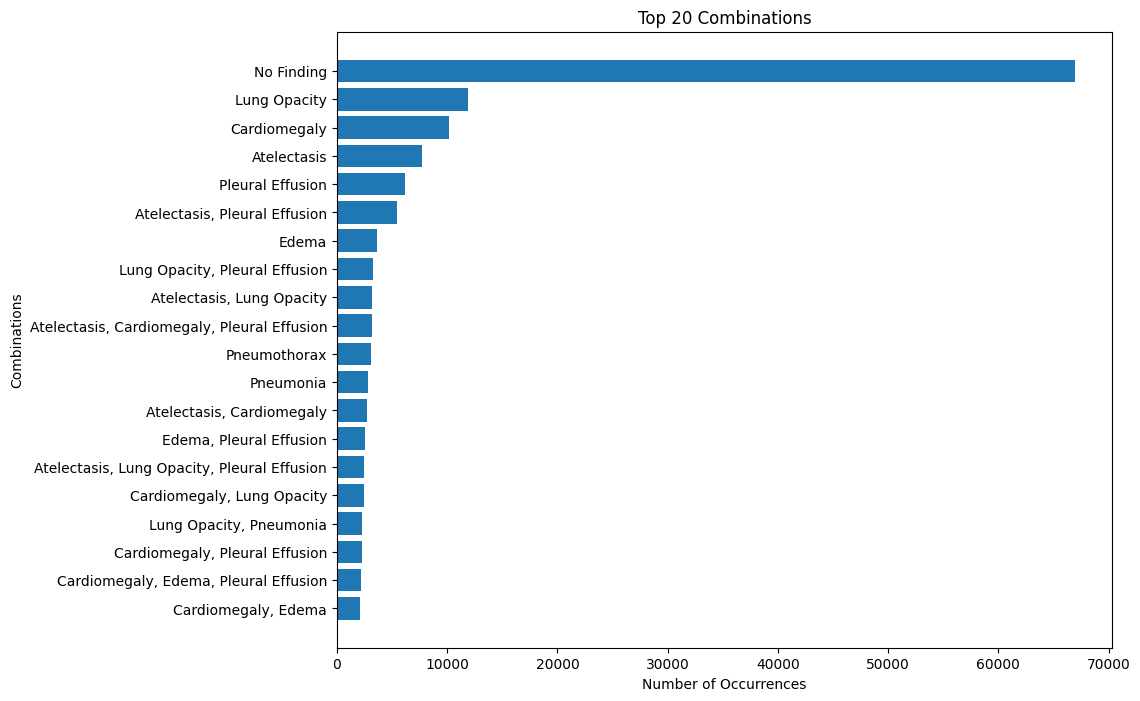

In [19]:
# ZEROS
plot_top_n_combinations(combination_zeros)

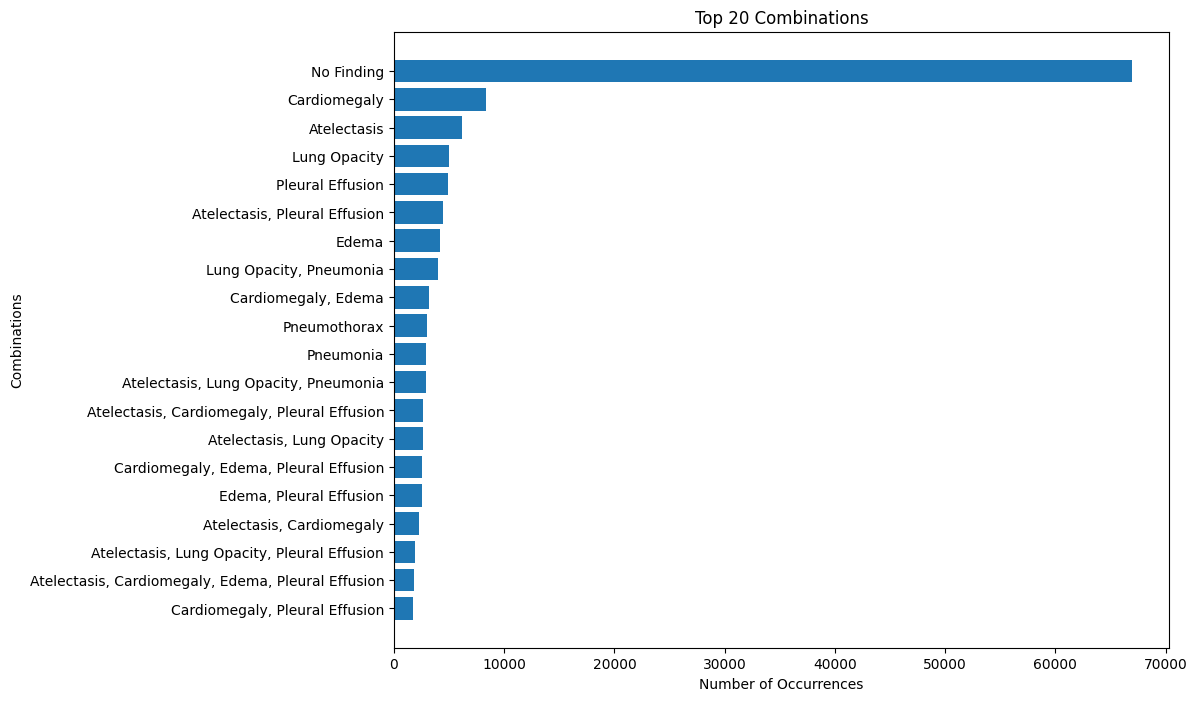

In [20]:
# ONES
plot_top_n_combinations(combination_ones)

In [24]:
from wordcloud import WordCloud

def plot_combination_wordcloud(disease_df):
    # Convert the DataFrame to a dictionary
    combinations_dict = disease_df.set_index('Combination')['Number'].to_dict()

    # Generate and display a word cloud
    wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(combinations_dict)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Combination Word Cloud')
    plt.show()


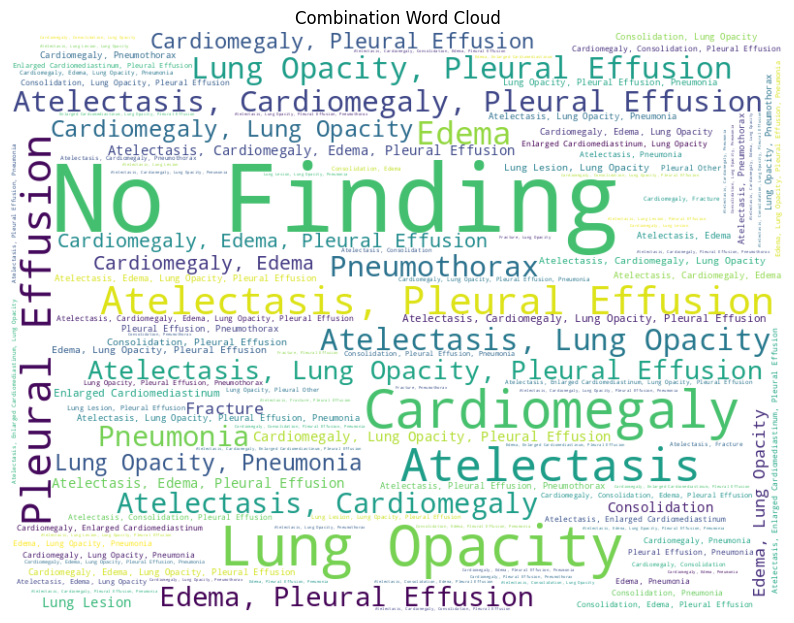

In [25]:
plot_combination_wordcloud(combination_zeros)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

def create_cooccurrence_matrix(disease_df, diseases):
    # Initialize a DataFrame to store the co-occurrence matrix
    co_occurrence_matrix = pd.DataFrame(0, index=diseases, columns=diseases)

    # Iterate over each row in the dataset
    for index, row in disease_df.iterrows():
        # Get the current combination as a list
        current_combination = row['Combination'].split(', ')
        # Update the matrix for each pair in the combination
        for disease1, disease2 in combinations(current_combination, 2):
            co_occurrence_matrix.at[disease1, disease2] += row['Number']
            co_occurrence_matrix.at[disease2, disease1] += row['Number']

    return co_occurrence_matrix

def plot_cooccurrence_heatmap(co_occurrence_matrix):
    plt.figure(figsize=(12, 10))
    sns.heatmap(co_occurrence_matrix, annot=True, fmt="d", cmap='viridis')
    plt.title('Pathology Co-occurrence Heatmap')
    plt.show()

# Example usage
diseases = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 
            'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 
            'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other', 
            'Pneumonia', 'Pneumothorax']

# Assuming disease_df is your existing DataFrame
co_occurrence_matrix_zeros = create_cooccurrence_matrix(combination_zeros, diseases)
co_occurrence_matrix_ones = create_cooccurrence_matrix(combination_ones, diseases)

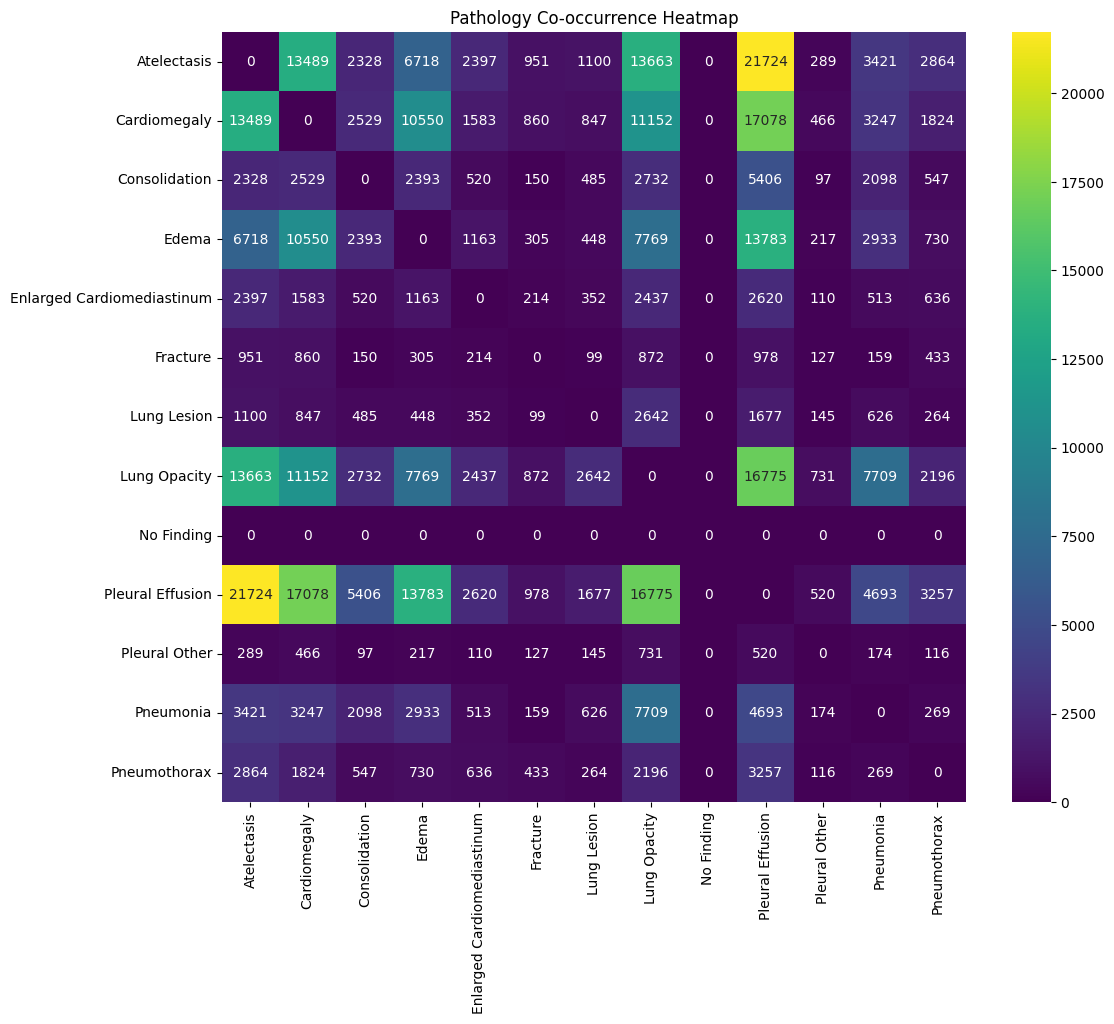

In [30]:
plot_cooccurrence_heatmap(co_occurrence_matrix_zeros)